# Stock Price Prediction Using LSTM

In [ ]:
pip install keras tensorflow scikit-learn pandas-datareader --upgrade

In [8]:
## Description: this program uses an artificial neural network called Long Short Term Memory to predict the closing price of a coporation using the past 60 day stock price
### Import the libraries
import math
import re
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [10]:
# Get the stock quote
symbol = input("Enter the symbol for a stock to look up:")
start_date, end_date = ("","")
while not re.match(r'^\d{4}-\d{2}-\d{2}$', start_date):
    start_date = input("Enter start date for the stock data in the format of yyyy-mm-dd:")
while not re.match(r'^\d{4}-\d{2}-\d{2}$', end_date):
    end_date = input("Enter end date for the stock data in the format of yyyy-mm-dd:")
df = web.DataReader(symbol, data_source="stooq", start=start_date, end=end_date)
# Show the data
df

Enter the symbol for a stock to look up: MSFT
Enter start date for the stock data in the format of yyyy-mm-dd: 2018-01-01
Enter end date for the stock data in the format of yyyy-mm-dd: 2024-12-31


,Open,High,Low,Close,Volume
Date,,,,,
2024-06-05,417.8100,424.0800,416.3000,424.0100,1.695877e+07
2024-06-04,412.4300,416.4400,409.6750,416.0700,1.434892e+07
2024-06-03,415.5250,416.4300,408.9234,413.5200,1.748468e+07
2024-05-31,416.7500,416.7500,404.5100,415.1300,4.799525e+07
2024-05-30,424.3000,424.3000,414.2400,414.6700,2.842485e+07
...,...,...,...,...,...
2018-01-08,83.0597,83.4171,82.4978,83.1341,2.347937e+07
2018-01-05,82.5515,83.2583,82.3340,83.0498,2.485140e+07
2018-01-04,81.5427,82.5515,81.5240,82.0332,2.326178e+07


In [11]:
# Get rows and columns in the data set
df.shape

(1617, 5)

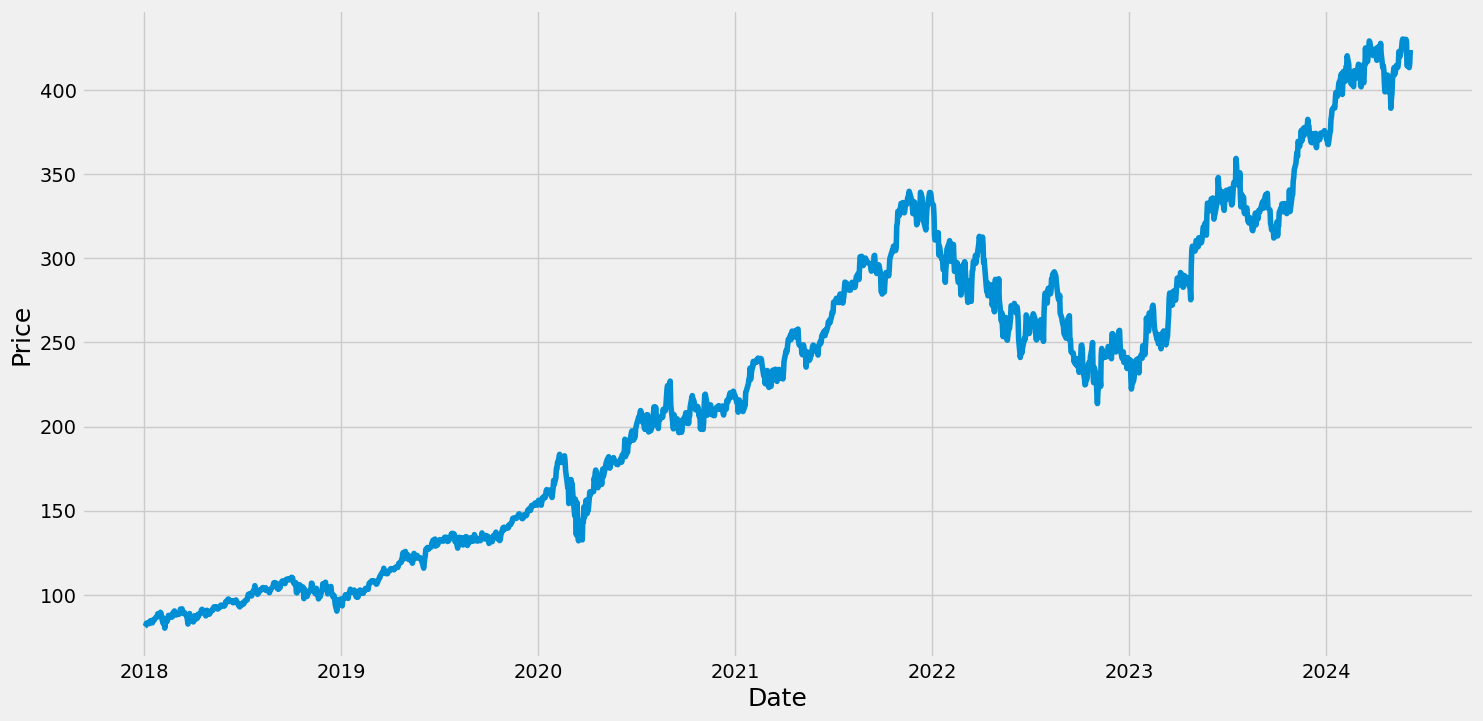

In [12]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title='Close Price History'
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [13]:
# Create a new datadrame with only the 'Close' column
data = df.filter(['Close'])
# Convert df to numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1294

In [14]:
# Scale the data before input into neural network
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.98142454],
       [0.95876876],
       [0.95149266],
       ...,
       [0.00563712],
       [0.00359183],
       [0.00251839]])

In [15]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.98142454, 0.95876876, 0.95149266, 0.95608659, 0.95477404,
       0.99614795, 0.99942933, 0.99897279, 0.98995613, 1.        ,
       0.99577701, 0.98521953, 0.97058172, 0.97280735, 0.9787709 ,
       0.96016691, 0.95206333, 0.95497377, 0.94806861, 0.9429896 ,
       0.93956556, 0.95154972, 0.93191852, 0.90675177, 0.89847698,
       0.88246956, 0.91933514, 0.93094837, 0.91017581, 0.93876661,
       0.93451509, 0.91565429, 0.91040408, 0.92509895, 0.94669899,
       0.95451723, 0.95183506, 0.97540392, 0.99260976, 0.97928451,
       0.9879017 , 0.98327923, 0.98573313, 0.96393336, 0.97126653,
       0.97409137, 0.98302243, 0.97203694, 0.97406284, 0.97469058,
       0.97814316, 0.994921  , 0.99671862, 0.98490566, 0.97400577,
       0.96233547, 0.95976744, 0.98487712, 0.95600099, 0.95651459])]
[0.9258122982665186]



In [16]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1234, 60, 1)

In [18]:
# Build the LSTM model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# Train the model, fit=train
model.fit(x_train, y_train, batch_size=1, epochs=1)

1234/1234 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0115


In [21]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [22]:
# Convert the data into a numpy arrayy
x_test = np.array(x_test)

In [23]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [24]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [25]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

9.976913118212437

/var/folders/lg/84ynqz393_vb5q98rr_3t6f00000gn/T/ipykernel_60114/2818875640.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, 'Predictions'] = predictions


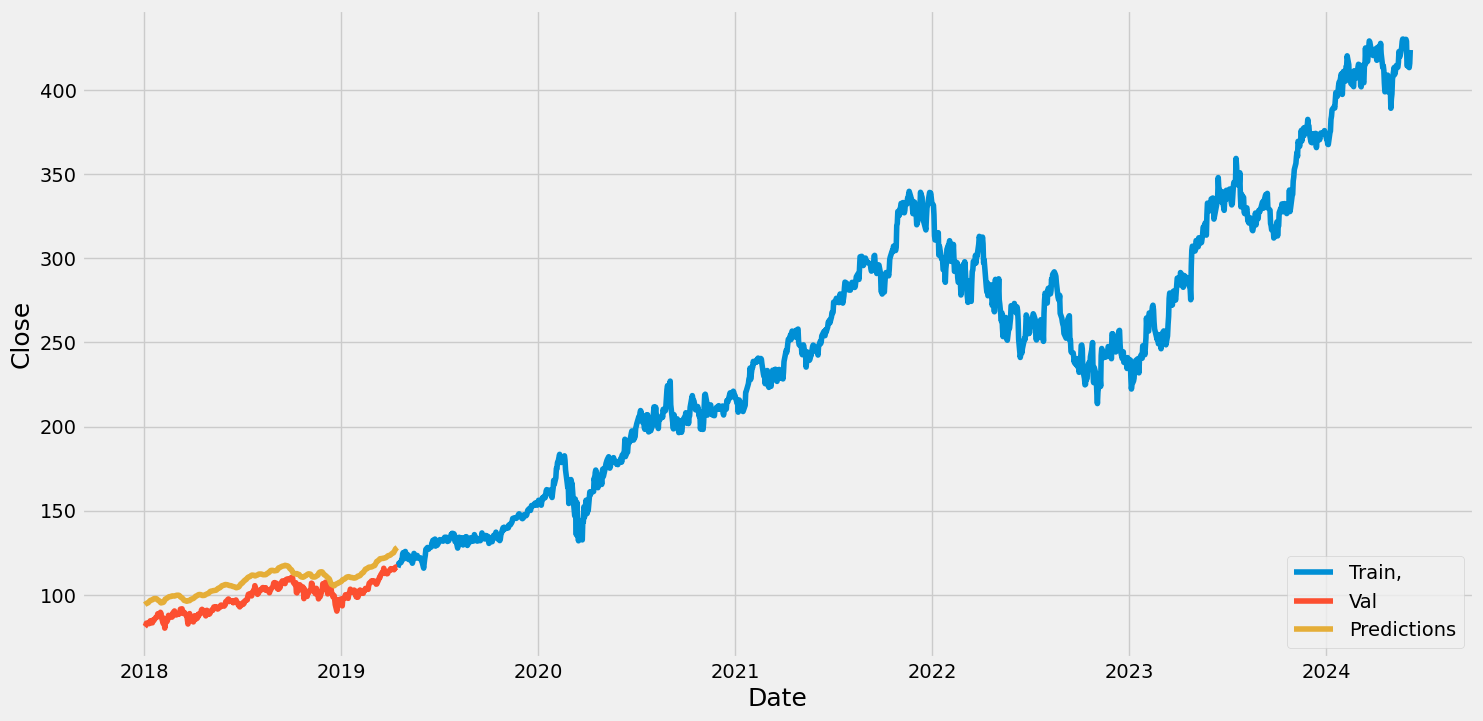

In [30]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid.loc[:, 'Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16, 8))
plt.title = 'Model'
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train,', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [31]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-04-15,116.4510,128.021454
2019-04-12,116.3620,127.280136
2019-04-11,115.7770,126.596069
2019-04-10,115.6470,125.960617
2019-04-09,114.7640,125.393478
...,...,...
2018-01-08,83.1341,95.077538
2018-01-05,83.0498,94.786621
2018-01-04,82.0332,94.546631
